<b>
<p>
<center>
<font size="5">
Machine Learning, Kaggle Competition Santander Customer Transaction Prediction:
</font>
</center>
</p>


# Overview

- Here we will work on kaggle competation [Santander Customer Transaction Prediction].(https://www.kaggle.com/c/santander-customer-transaction-prediction/overview)


- Reference for functions:
https://github.com/yuxiaohuang/teaching/blob/master/gwu/machine_learning_I/spring_2022/code/utilities/p2_shallow_learning/pmlm_utilities_shallow.ipynb

- Pipeline
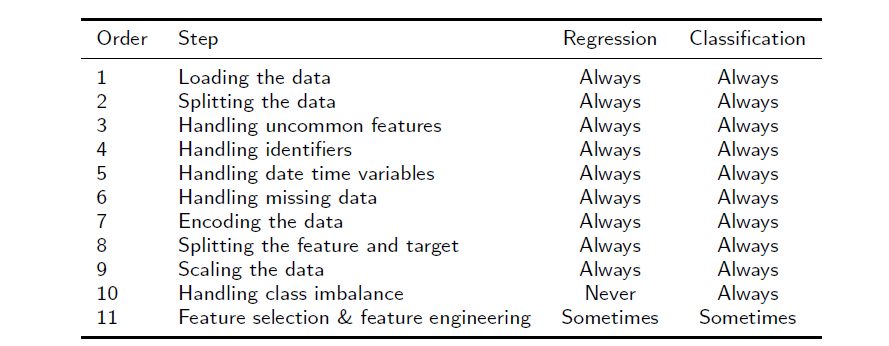


# Notebook Configuration

## Google drive

In [ ]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/Colab Notebooks/ML1_Assignment'

# Get the absolute path of the shallow utilities folder
abspath_util_shallow = '/content/drive/My Drive/Colab Notebooks/code/utilities/p2_shallow_learning/'

# Get the absolute path of the shallow models folder
abspath_model_shallow = '/content/drive/My Drive/Colab Notebooks/code/models/p2_shallow_learning/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Warning

In [ ]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

## Matplotlib

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

## TensorFlow

In [ ]:
# The magic below allows us to use tensorflow version 2.x
%tensorflow_version 2.x 
import tensorflow as tf
from tensorflow import keras

## Random seed

In [ ]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

# Data Preprocessing

In [ ]:
#LOADING DATA

In [ ]:
# Change working directory to the absolute path of the shallow utilities folder
%cd $abspath_util_shallow

# Import the shallow utitilities
%run pmlm_utilities_shallow.ipynb

/content/drive/My Drive/Colab Notebooks/code/utilities/p2_shallow_learning


In [ ]:
# Implement me

import pandas as pd 

df_raw_train = pd.read_csv(abspath_curr+ '/dataset/Satander_Customer_Transaction/train.csv')
df_raw_test = pd.read_csv(abspath_curr+ '/dataset/Satander_Customer_Transaction/test.csv')

In [ ]:
df_raw_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,...,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,...,29.4846,5.8683,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,11.0752,-5.5937,9.4878,-14.9100,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,...,13.2070,5.8442,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.4013,-4.2935,9.3908,-13.2648,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,2.8521,...,31.8833,5.9684,7.2084,3.8899,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.6961,-3.7546,8.4117,1.8986,7.2601,-0.4639,-0.0498,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015,7.9352,-3.1582,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,5.8184,...,33.5107,5.6953,5.4663,18.2201,6.5769,21.2607,3.2304,-1.7759,3.1283,5.5518,1.4493,-2.6627,19.8056,2.3705,18.4685,16.3309,-3.3456,13.5261,1.7189,5.1743,-7.6938,9.7685,4.8910,12.2198,11.8503,-7.8931,6.4209,5.9270,16.0201,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [ ]:
df_raw_test.isna().sum()

ID_code    0
var_0      0
var_1      0
var_2      0
var_3      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 201, dtype: int64

In [ ]:
df_train = df_raw_train.copy(deep=True)
df_test = df_raw_test.copy(deep = True)

In [ ]:
target = 'target'

In [ ]:
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,200000,202


In [ ]:
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,200000,201


In [ ]:
#SPLITTING THE DATA

from sklearn.model_selection import train_test_split

# Divide the training data into training (80%) and validation (20%)
df_train, df_val = train_test_split(df_train, train_size=0.8, random_state=random_seed)

In [ ]:
df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
153248,train_153248,0,12.3039,-8.3899,9.1944,8.0649,9.0247,-1.9559,5.1565,21.1631,2.7437,8.5623,-9.1195,-5.0654,14.0421,9.3000,11.4089,14.7424,5.4342,-9.7680,11.9534,4.5106,13.3095,27.9682,10.3165,2.4899,8.7296,14.2002,3.8301,0.5474,5.2150,4.8237,-24.0381,10.9788,0.2066,20.0695,11.2086,1.4242,5.5014,4.1958,...,30.6330,5.4488,7.0295,3.4218,1.3661,19.1868,3.3058,-4.5841,3.4557,6.0094,-8.3475,7.9825,13.5424,-0.2908,13.9061,11.8151,3.0716,15.0284,2.1214,8.0848,-4.8168,10.6747,-2.1049,8.8938,19.6247,-2.7233,13.4097,-20.9951,20.2230,-0.3264,5.5185,7.9504,0.9184,5.9945,11.0078,-1.0936,-2.3412,8.1712,12.9046,-1.9309
67802,train_67802,0,15.4069,2.7820,9.2951,7.1997,8.5359,-4.5422,5.4210,9.9651,4.0623,8.4689,-6.0590,0.7759,13.7854,4.0456,5.4438,13.8766,8.6089,-16.3946,20.4100,18.2099,11.9410,29.8901,11.0320,3.4647,4.9191,13.5724,-10.3379,-0.5933,5.5332,3.7098,-22.4284,8.6950,0.4795,18.2231,11.6430,-5.9229,5.7317,3.3921,...,16.9319,5.5766,4.9744,12.8968,-1.7498,16.7136,3.3190,-4.8081,1.0132,5.9494,-5.5387,2.0530,15.1127,-4.3515,19.6645,13.2448,-8.3029,8.8979,11.6191,2.5894,-2.2567,10.0503,-5.1231,9.7286,-3.4912,5.4957,12.0615,-17.0887,10.5468,0.5903,3.0063,5.6555,2.1527,1.3518,15.4728,0.2686,6.5523,8.4698,22.0454,1.4756
148889,train_148889,0,9.6427,-4.6261,6.9610,5.4054,12.0859,-11.2917,4.5290,13.8605,-0.8366,8.4388,-4.8543,-3.8446,13.7602,11.3746,9.2359,14.9431,7.9527,-6.8255,12.5890,21.1809,9.1416,27.5496,4.1218,3.8318,6.1385,14.4584,0.0636,-1.5841,5.1242,7.3442,3.3498,4.8306,-1.3744,18.3092,11.8856,7.3965,3.7448,8.7036,...,23.6963,5.2485,8.7027,8.3478,-5.7018,19.3036,2.7621,0.7174,3.7536,6.2652,-7.7119,3.1409,17.9489,-6.6449,4.4238,10.9679,-10.2859,8.2506,9.9924,5.9168,-3.7932,11.4330,8.0982,15.4265,7.4456,0.2757,7.5569,-7.1702,15.3692,0.4535,3.4351,9.1779,1.5004,1.9895,20.4072,-0.1118,0.5692,9.3290,12.8980,-9.4318
103093,train_103093,1,9.6881,-5.6696,11.2709,8.2812,13.9232,-16.1434,4.9664,20.1092,-5.9868,8.4514,-2.8435,-6.8732,14.2079,6.5918,11.2923,14.1828,10.0402,1.2997,20.5645,28.4864,10.9094,7.2806,5.0493,3.6683,14.8643,13.7662,-9.7314,-1.3767,4.7863,2.0560,-16.1634,13.5568,-1.1293,7.6161,11.9110,2.8845,4.0571,7.9969,...,24.3598,6.1042,6.8922,17.9486,0.3322,11.7082,2.8908,-5.6976,8.1320,5.2168,-5.0848,-4.4787,22.2903,4.3004,28.5218,12.3033,3.7143,13.6896,16.9191,2.7819,-8.9304,9.5898,-10.1931,17.1104,25.9923,-12.5229,11.8213,-15.8289,19.5687,1.2158,-4.9494,9.2727,1.1371,3.7435,20.6906,1.3752,7.4442,9.2145,18.2777,-2.5865
104681,train_104681,0,7.1128,-2.0830,11.4807,8.3033,10.6180,-6.4743,5.0078,21.0212,-4.9779,9.1260,4.6706,-10.6114,13.7493,6.3089,4.9396,15.0864,11.1357,-10.7133,11.6957,3.6591,18.2128,23.6617,1.6646,2.6451,6.1443,13.9475,-8.1451,-0.6311,5.6320,2.3330,1.0674,13.3107,-2.3119,11.2375,11.9568,7.8714,8.0269,8.7347,...,21.4064,5.5814,6.0163,17.4770,-1.0434,14.3632,2.5999,-0.3436,5.7521,5.7825,0.8032,-2.7698,13.2530,-0.1776,15.6257,17.1736,0.6404,11.1395,15.4044,2.4522,-9.5583,8.9755,-0.8453,8.9209,20.0507,-9.1914,5.8473,-7.1620,19.8325,2.1774,7.3583,8.1992,1.3436,8.8929,21.6711,-2.0557,6.4975,8.3110,13.7728,-5.9028


In [ ]:
# Reset the index
df_train, df_val = df_train.reset_index(drop=True), df_val.reset_index(drop=True)

In [ ]:
df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_153248,0,12.3039,-8.3899,9.1944,8.0649,9.0247,-1.9559,5.1565,21.1631,2.7437,8.5623,-9.1195,-5.0654,14.0421,9.3000,11.4089,14.7424,5.4342,-9.7680,11.9534,4.5106,13.3095,27.9682,10.3165,2.4899,8.7296,14.2002,3.8301,0.5474,5.2150,4.8237,-24.0381,10.9788,0.2066,20.0695,11.2086,1.4242,5.5014,4.1958,...,30.6330,5.4488,7.0295,3.4218,1.3661,19.1868,3.3058,-4.5841,3.4557,6.0094,-8.3475,7.9825,13.5424,-0.2908,13.9061,11.8151,3.0716,15.0284,2.1214,8.0848,-4.8168,10.6747,-2.1049,8.8938,19.6247,-2.7233,13.4097,-20.9951,20.2230,-0.3264,5.5185,7.9504,0.9184,5.9945,11.0078,-1.0936,-2.3412,8.1712,12.9046,-1.9309
1,train_67802,0,15.4069,2.7820,9.2951,7.1997,8.5359,-4.5422,5.4210,9.9651,4.0623,8.4689,-6.0590,0.7759,13.7854,4.0456,5.4438,13.8766,8.6089,-16.3946,20.4100,18.2099,11.9410,29.8901,11.0320,3.4647,4.9191,13.5724,-10.3379,-0.5933,5.5332,3.7098,-22.4284,8.6950,0.4795,18.2231,11.6430,-5.9229,5.7317,3.3921,...,16.9319,5.5766,4.9744,12.8968,-1.7498,16.7136,3.3190,-4.8081,1.0132,5.9494,-5.5387,2.0530,15.1127,-4.3515,19.6645,13.2448,-8.3029,8.8979,11.6191,2.5894,-2.2567,10.0503,-5.1231,9.7286,-3.4912,5.4957,12.0615,-17.0887,10.5468,0.5903,3.0063,5.6555,2.1527,1.3518,15.4728,0.2686,6.5523,8.4698,22.0454,1.4756
2,train_148889,0,9.6427,-4.6261,6.9610,5.4054,12.0859,-11.2917,4.5290,13.8605,-0.8366,8.4388,-4.8543,-3.8446,13.7602,11.3746,9.2359,14.9431,7.9527,-6.8255,12.5890,21.1809,9.1416,27.5496,4.1218,3.8318,6.1385,14.4584,0.0636,-1.5841,5.1242,7.3442,3.3498,4.8306,-1.3744,18.3092,11.8856,7.3965,3.7448,8.7036,...,23.6963,5.2485,8.7027,8.3478,-5.7018,19.3036,2.7621,0.7174,3.7536,6.2652,-7.7119,3.1409,17.9489,-6.6449,4.4238,10.9679,-10.2859,8.2506,9.9924,5.9168,-3.7932,11.4330,8.0982,15.4265,7.4456,0.2757,7.5569,-7.1702,15.3692,0.4535,3.4351,9.1779,1.5004,1.9895,20.4072,-0.1118,0.5692,9.3290,12.8980,-9.4318
3,train_103093,1,9.6881,-5.6696,11.2709,8.2812,13.9232,-16.1434,4.9664,20.1092,-5.9868,8.4514,-2.8435,-6.8732,14.2079,6.5918,11.2923,14.1828,10.0402,1.2997,20.5645,28.4864,10.9094,7.2806,5.0493,3.6683,14.8643,13.7662,-9.7314,-1.3767,4.7863,2.0560,-16.1634,13.5568,-1.1293,7.6161,11.9110,2.8845,4.0571,7.9969,...,24.3598,6.1042,6.8922,17.9486,0.3322,11.7082,2.8908,-5.6976,8.1320,5.2168,-5.0848,-4.4787,22.2903,4.3004,28.5218,12.3033,3.7143,13.6896,16.9191,2.7819,-8.9304,9.5898,-10.1931,17.1104,25.9923,-12.5229,11.8213,-15.8289,19.5687,1.2158,-4.9494,9.2727,1.1371,3.7435,20.6906,1.3752,7.4442,9.2145,18.2777,-2.5865
4,train_104681,0,7.1128,-2.0830,11.4807,8.3033,10.6180,-6.4743,5.0078,21.0212,-4.9779,9.1260,4.6706,-10.6114,13.7493,6.3089,4.9396,15.0864,11.1357,-10.7133,11.6957,3.6591,18.2128,23.6617,1.6646,2.6451,6.1443,13.9475,-8.1451,-0.6311,5.6320,2.3330,1.0674,13.3107,-2.3119,11.2375,11.9568,7.8714,8.0269,8.7347,...,21.4064,5.5814,6.0163,17.4770,-1.0434,14.3632,2.5999,-0.3436,5.7521,5.7825,0.8032,-2.7698,13.2530,-0.1776,15.6257,17.1736,0.6404,11.1395,15.4044,2.4522,-9.5583,8.9755,-0.8453,8.9209,20.0507,-9.1914,5.8473,-7.1620,19.8325,2.1774,7.3583,8.1992,1.3436,8.8929,21.6711,-2.0557,6.4975,8.3110,13.7728,-5.9028


In [ ]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,160000,202


In [ ]:
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,40000,202


In [ ]:
df_common_var = common_var_checker(df_train, df_val, df_test,target)
df_common_var

,common var
0,ID_code
1,target
2,var_0
3,var_1
4,var_10
...,...
197,var_95
198,var_96
199,var_97
200,var_98


In [ ]:
# Get the features in the training data but not in the validation or test data
uncommon_feature_train_not_val_test = np.setdiff1d(df_train.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_train_not_val_test, columns=['uncommon feature'])

,uncommon feature


In [ ]:
# Get the features in the validation data but not in the training or test data
uncommon_feature_val_not_test_train = np.setdiff1d(df_val.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_val_not_test_train, columns=['uncommon feature'])

,uncommon feature


In [ ]:
# Get the features in the test data but not in the training or validation data
uncommon_feature_test_not_train_val = np.setdiff1d(df_test.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_test_not_train_val, columns=['uncommon feature'])

,uncommon feature


In [ ]:
# Remove the uncommon features from the training data
df_train = df_train.drop(columns=uncommon_feature_train_not_val_test)

# Print the first 5 rows of df_train
df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_153248,0,12.3039,-8.3899,9.1944,8.0649,9.0247,-1.9559,5.1565,21.1631,2.7437,8.5623,-9.1195,-5.0654,14.0421,9.3000,11.4089,14.7424,5.4342,-9.7680,11.9534,4.5106,13.3095,27.9682,10.3165,2.4899,8.7296,14.2002,3.8301,0.5474,5.2150,4.8237,-24.0381,10.9788,0.2066,20.0695,11.2086,1.4242,5.5014,4.1958,...,30.6330,5.4488,7.0295,3.4218,1.3661,19.1868,3.3058,-4.5841,3.4557,6.0094,-8.3475,7.9825,13.5424,-0.2908,13.9061,11.8151,3.0716,15.0284,2.1214,8.0848,-4.8168,10.6747,-2.1049,8.8938,19.6247,-2.7233,13.4097,-20.9951,20.2230,-0.3264,5.5185,7.9504,0.9184,5.9945,11.0078,-1.0936,-2.3412,8.1712,12.9046,-1.9309
1,train_67802,0,15.4069,2.7820,9.2951,7.1997,8.5359,-4.5422,5.4210,9.9651,4.0623,8.4689,-6.0590,0.7759,13.7854,4.0456,5.4438,13.8766,8.6089,-16.3946,20.4100,18.2099,11.9410,29.8901,11.0320,3.4647,4.9191,13.5724,-10.3379,-0.5933,5.5332,3.7098,-22.4284,8.6950,0.4795,18.2231,11.6430,-5.9229,5.7317,3.3921,...,16.9319,5.5766,4.9744,12.8968,-1.7498,16.7136,3.3190,-4.8081,1.0132,5.9494,-5.5387,2.0530,15.1127,-4.3515,19.6645,13.2448,-8.3029,8.8979,11.6191,2.5894,-2.2567,10.0503,-5.1231,9.7286,-3.4912,5.4957,12.0615,-17.0887,10.5468,0.5903,3.0063,5.6555,2.1527,1.3518,15.4728,0.2686,6.5523,8.4698,22.0454,1.4756
2,train_148889,0,9.6427,-4.6261,6.9610,5.4054,12.0859,-11.2917,4.5290,13.8605,-0.8366,8.4388,-4.8543,-3.8446,13.7602,11.3746,9.2359,14.9431,7.9527,-6.8255,12.5890,21.1809,9.1416,27.5496,4.1218,3.8318,6.1385,14.4584,0.0636,-1.5841,5.1242,7.3442,3.3498,4.8306,-1.3744,18.3092,11.8856,7.3965,3.7448,8.7036,...,23.6963,5.2485,8.7027,8.3478,-5.7018,19.3036,2.7621,0.7174,3.7536,6.2652,-7.7119,3.1409,17.9489,-6.6449,4.4238,10.9679,-10.2859,8.2506,9.9924,5.9168,-3.7932,11.4330,8.0982,15.4265,7.4456,0.2757,7.5569,-7.1702,15.3692,0.4535,3.4351,9.1779,1.5004,1.9895,20.4072,-0.1118,0.5692,9.3290,12.8980,-9.4318
3,train_103093,1,9.6881,-5.6696,11.2709,8.2812,13.9232,-16.1434,4.9664,20.1092,-5.9868,8.4514,-2.8435,-6.8732,14.2079,6.5918,11.2923,14.1828,10.0402,1.2997,20.5645,28.4864,10.9094,7.2806,5.0493,3.6683,14.8643,13.7662,-9.7314,-1.3767,4.7863,2.0560,-16.1634,13.5568,-1.1293,7.6161,11.9110,2.8845,4.0571,7.9969,...,24.3598,6.1042,6.8922,17.9486,0.3322,11.7082,2.8908,-5.6976,8.1320,5.2168,-5.0848,-4.4787,22.2903,4.3004,28.5218,12.3033,3.7143,13.6896,16.9191,2.7819,-8.9304,9.5898,-10.1931,17.1104,25.9923,-12.5229,11.8213,-15.8289,19.5687,1.2158,-4.9494,9.2727,1.1371,3.7435,20.6906,1.3752,7.4442,9.2145,18.2777,-2.5865
4,train_104681,0,7.1128,-2.0830,11.4807,8.3033,10.6180,-6.4743,5.0078,21.0212,-4.9779,9.1260,4.6706,-10.6114,13.7493,6.3089,4.9396,15.0864,11.1357,-10.7133,11.6957,3.6591,18.2128,23.6617,1.6646,2.6451,6.1443,13.9475,-8.1451,-0.6311,5.6320,2.3330,1.0674,13.3107,-2.3119,11.2375,11.9568,7.8714,8.0269,8.7347,...,21.4064,5.5814,6.0163,17.4770,-1.0434,14.3632,2.5999,-0.3436,5.7521,5.7825,0.8032,-2.7698,13.2530,-0.1776,15.6257,17.1736,0.6404,11.1395,15.4044,2.4522,-9.5583,8.9755,-0.8453,8.9209,20.0507,-9.1914,5.8473,-7.1620,19.8325,2.1774,7.3583,8.1992,1.3436,8.8929,21.6711,-2.0557,6.4975,8.3110,13.7728,-5.9028


In [ ]:
# Remove the uncommon features from the validation data
# Try uncommon_feature_val_not_test_train 
df_val = df_val.drop(columns=uncommon_feature_val_not_test_train)

# Print the first 5 rows of df_val
df_val.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_119737,0,11.0038,-4.5026,9.0662,6.4313,10.7061,-15.2857,5.1233,16.7875,4.1833,8.4055,-4.1540,-10.8329,14.2550,3.1023,8.3950,14.6973,9.3601,-16.2458,25.2103,5.2981,25.7090,26.2138,3.1250,3.8624,9.8719,13.3379,-0.2924,-2.8902,6.6151,2.6974,-12.9289,10.3559,-4.5293,14.8238,10.7379,-5.9351,-2.7626,3.3004,...,39.8310,5.8701,6.4919,10.2185,2.0958,21.2336,3.0491,-2.9704,3.1441,6.2050,0.4583,0.0768,15.5984,-4.9126,25.2907,8.1378,-8.2284,8.8929,-4.6192,0.8818,-9.0733,10.0524,8.8823,7.9633,2.9247,-1.8443,4.4832,-23.8737,11.0638,-0.5127,-0.8200,3.3085,3.1358,5.0959,19.7160,-0.1801,5.8437,8.8348,17.0461,8.8190
1,train_72272,0,12.8473,-6.1848,6.8799,2.0164,12.7998,10.2781,4.4191,15.6940,-0.6788,8.9070,-7.8677,4.3768,13.9440,8.0701,8.7038,14.3273,11.9843,-18.4636,28.0855,10.8519,15.4678,38.9225,1.0837,3.9982,9.2248,13.8777,-6.0565,-3.6397,7.0398,-0.1248,-6.5387,10.3549,-3.2378,12.4834,12.5291,2.7469,1.1170,7.3866,...,25.4366,5.9524,3.0484,12.4763,-9.9036,14.4365,3.3320,-7.3907,8.2721,5.1837,-2.7948,2.3001,15.4416,-10.2320,30.5735,8.7345,-4.1818,14.0352,7.3551,1.4468,-15.6600,9.6867,1.3316,5.7320,29.5496,-13.7862,3.5507,-32.8269,15.5753,2.0424,1.1516,3.9019,4.6616,7.6035,12.6402,-0.3037,-4.2330,9.7456,14.8337,-3.7167
2,train_158154,0,13.1827,-0.8344,13.4689,3.9060,13.5984,4.6475,5.9659,24.0557,3.8743,7.6350,-4.2686,-10.2086,13.7723,13.6299,3.9546,14.7699,5.7576,2.2429,11.7882,4.1893,23.3047,27.5959,2.6682,2.8959,17.2182,13.6163,-21.1043,-0.5560,6.1122,8.3342,-1.1017,7.7299,2.1746,12.5346,12.5058,1.8219,1.6200,6.1862,...,33.8664,5.7706,8.6353,20.6984,1.0489,31.0015,3.2609,11.3223,4.0412,5.8796,2.3787,-11.1090,21.4869,4.4984,37.7119,9.4352,0.1989,8.6130,15.0827,0.5547,-9.8419,9.8494,-6.0857,-1.6701,4.1295,-14.1248,11.3229,-11.3760,13.9692,0.1606,2.8737,5.8939,0.8525,8.7406,16.6641,0.8745,7.0406,8.6424,20.7107,-5.4186
3,train_65426,0,8.2132,1.2309,11.1464,9.4524,10.2142,4.0416,5.3989,20.4527,0.2915,6.3123,-6.9638,-2.6824,14.0316,1.9909,6.1070,14.7762,9.9599,-21.4055,6.7828,10.1881,1.2846,11.7721,8.9509,2.9490,5.1252,13.6851,-5.3924,0.5694,3.9186,6.3234,5.3562,9.0964,3.4010,13.2766,11.8447,-1.0570,1.7185,7.3979,...,38.7791,5.3816,6.2022,15.0310,-9.2041,26.2018,3.4049,-14.4172,6.8057,5.0137,2.6708,-1.6476,12.0776,-5.7274,17.8412,11.1943,-7.1989,12.0702,-5.5935,5.5068,4.7851,9.4399,-7.3687,6.7793,16.0896,5.6344,6.4042,-24.5884,6.8700,1.0351,6.4752,5.7442,2.1907,6.0651,10.9444,-2.0666,-7.9209,9.0522,17.1735,12.4656
4,train_30074,1,5.5681,4.6355,15.2350,3.0718,11.8178,-15.0502,3.8357,12.0169,3.2997,6.3261,0.4133,-10.7155,14.0147,3.8835,6.2724,14.0034,8.0050,1.3897,14.2519,16.8915,16.5411,2.4940,11.0470,2.9486,9.1956,13.4267,-10.7739,-2.9967,4.5461,7.6530,-21.6489,8.4016,4.4890,9.9456,11.3279,3.4108,-3.1240,4.1558,...,16.0132,5.6508,6.6590,13.0170,-10.0459,22.0984,2.2650,-11.1995,-0.4548,6.1947,-4.4184,1.4196,25.0295,2.4453,13.9159,10.9190,-7.1533,12.6144,-1.0282,7.0979,2.3174,10.6060,6.4930,2.6453,19.2039,-2.3856,9.6478,-7.1921,17.2569,1.3937,4.1796,5.6113,-0.1561,3.1010,17.4297,-1.0121,-6.5168,7.9772,18.5248,11.2771


In [ ]:
# Remove the uncommon features from the test data
df_test = df_test.drop(columns=uncommon_feature_test_not_train_val)

# Print the first 5 rows of df_test
df_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,-2.0248,-4.3554,13.9696,0.3458,7.5408,14.5001,7.7028,-19.0919,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,5.7107,3.7864,-1.7981,9.2645,2.0657,12.7753,11.3334,8.1462,-0.0610,3.5331,9.7804,...,5.9232,5.4113,3.8302,5.7380,-8.6105,22.9530,2.5531,-0.2836,4.3416,5.1855,4.2603,1.6779,29.0849,8.4685,18.1317,12.2818,-0.6912,10.2226,-5.5579,2.2926,-4.5358,10.3903,-15.4937,3.9697,31.3521,-1.1651,9.2874,-23.5705,13.2643,1.6591,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,-1.3809,-0.3310,14.1129,2.5667,5.4988,14.1853,7.0196,4.6564,29.1609,0.0910,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,5.7080,2.9965,-10.4720,11.4938,-0.9660,15.3445,10.6361,0.8966,6.7428,2.3421,12.8678,...,30.9641,5.6723,3.6873,13.0429,-10.6572,15.5134,3.2185,9.0535,7.0535,5.3924,-0.7720,-8.1783,29.9227,-5.6274,10.5018,9.6083,-0.4935,8.1696,-4.3605,5.2110,0.4087,12.0030,-10.3812,5.8496,25.1958,-8.8468,11.8263,-8.7112,15.9072,0.9812,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,-4.7057,-3.0422,13.6751,3.8183,10.8535,14.2126,9.8837,2.6541,21.2181,20.8163,12.4666,12.3696,4.7473,2.7936,5.2189,13.5670,-15.4246,-0.1655,7.2633,3.4310,-9.1508,9.7320,3.1062,22.3076,11.9593,9.9255,4.0702,4.9934,8.0667,...,39.3654,5.5228,3.3159,4.3324,-0.5382,13.3009,3.1243,-4.1731,1.2330,6.1513,-0.0391,1.4950,16.8874,-2.9787,27.4035,15.8819,-10.9660,15.6415,-9.4056,4.4611,-3.0835,8.5549,-2.8517,13.4770,24.4721,-3.4824,4.9178,-2.0720,11.5390,1.1821,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,0.0095,-5.0659,14.0526,13.5010,8.7660,14.7352,10.0383,-15.3508,2.1273,21.4797,14.5372,12.5527,2.9707,4.2398,13.7796,14.1408,1.0061,-1.3479,5.2570,6.5911,6.2161,9.5540,2.3628,10.2124,10.8047,-2.5588,6.0720,3.2613,16.5632,...,19.7251,5.3882,3.6775,7.4753,-11.0780,24.8712,2.6415,2.2673,7.2788,5.6406,7.2048,3.4504,2.4130,11.1674,14.5499,10.6151,-5.7922,13.9407,7.1078,1.1019,9.4590,9.8243,5.9917,5.1634,8.1154,3.6638,3.3102,-19.7819,13.4499,1.3104,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,5.1025,-3.2827,14.1013,8.9672,4.7276,14.5811,11.8615,3.1480,18.0126,13.8006,1.6026,16.3059,6.7954,3.6015,13.6569,13.8807,8.6228,-2.2654,5.2255,7.0165,-15.6961,10.6239,-4.7674,17.5447,11.8668,3.0154,4.2546,6.7601,5.9613,...,22.8700,5.6688,6.1159,13.2433,-11.9785,26.2040,3.2348,-5.5775,5.7036,6.1717,-1.6039,-2.4866,17.2728,2.3640,14.0037,12.9165,-12.0311,10.1161,-8.7562,6.0889,-1.3620,10.3559,-7.4915,9.4588,3.9829,5.8580,8.3635,-24.8254,11.4928,1.6321,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [ ]:
#Handling Identifiers

In [ ]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test])
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_153248,0.0,12.3039,-8.3899,9.1944,8.0649,9.0247,-1.9559,5.1565,21.1631,2.7437,8.5623,-9.1195,-5.0654,14.0421,9.3000,11.4089,14.7424,5.4342,-9.7680,11.9534,4.5106,13.3095,27.9682,10.3165,2.4899,8.7296,14.2002,3.8301,0.5474,5.2150,4.8237,-24.0381,10.9788,0.2066,20.0695,11.2086,1.4242,5.5014,4.1958,...,30.6330,5.4488,7.0295,3.4218,1.3661,19.1868,3.3058,-4.5841,3.4557,6.0094,-8.3475,7.9825,13.5424,-0.2908,13.9061,11.8151,3.0716,15.0284,2.1214,8.0848,-4.8168,10.6747,-2.1049,8.8938,19.6247,-2.7233,13.4097,-20.9951,20.2230,-0.3264,5.5185,7.9504,0.9184,5.9945,11.0078,-1.0936,-2.3412,8.1712,12.9046,-1.9309
1,train_67802,0.0,15.4069,2.7820,9.2951,7.1997,8.5359,-4.5422,5.4210,9.9651,4.0623,8.4689,-6.0590,0.7759,13.7854,4.0456,5.4438,13.8766,8.6089,-16.3946,20.4100,18.2099,11.9410,29.8901,11.0320,3.4647,4.9191,13.5724,-10.3379,-0.5933,5.5332,3.7098,-22.4284,8.6950,0.4795,18.2231,11.6430,-5.9229,5.7317,3.3921,...,16.9319,5.5766,4.9744,12.8968,-1.7498,16.7136,3.3190,-4.8081,1.0132,5.9494,-5.5387,2.0530,15.1127,-4.3515,19.6645,13.2448,-8.3029,8.8979,11.6191,2.5894,-2.2567,10.0503,-5.1231,9.7286,-3.4912,5.4957,12.0615,-17.0887,10.5468,0.5903,3.0063,5.6555,2.1527,1.3518,15.4728,0.2686,6.5523,8.4698,22.0454,1.4756
2,train_148889,0.0,9.6427,-4.6261,6.9610,5.4054,12.0859,-11.2917,4.5290,13.8605,-0.8366,8.4388,-4.8543,-3.8446,13.7602,11.3746,9.2359,14.9431,7.9527,-6.8255,12.5890,21.1809,9.1416,27.5496,4.1218,3.8318,6.1385,14.4584,0.0636,-1.5841,5.1242,7.3442,3.3498,4.8306,-1.3744,18.3092,11.8856,7.3965,3.7448,8.7036,...,23.6963,5.2485,8.7027,8.3478,-5.7018,19.3036,2.7621,0.7174,3.7536,6.2652,-7.7119,3.1409,17.9489,-6.6449,4.4238,10.9679,-10.2859,8.2506,9.9924,5.9168,-3.7932,11.4330,8.0982,15.4265,7.4456,0.2757,7.5569,-7.1702,15.3692,0.4535,3.4351,9.1779,1.5004,1.9895,20.4072,-0.1118,0.5692,9.3290,12.8980,-9.4318
3,train_103093,1.0,9.6881,-5.6696,11.2709,8.2812,13.9232,-16.1434,4.9664,20.1092,-5.9868,8.4514,-2.8435,-6.8732,14.2079,6.5918,11.2923,14.1828,10.0402,1.2997,20.5645,28.4864,10.9094,7.2806,5.0493,3.6683,14.8643,13.7662,-9.7314,-1.3767,4.7863,2.0560,-16.1634,13.5568,-1.1293,7.6161,11.9110,2.8845,4.0571,7.9969,...,24.3598,6.1042,6.8922,17.9486,0.3322,11.7082,2.8908,-5.6976,8.1320,5.2168,-5.0848,-4.4787,22.2903,4.3004,28.5218,12.3033,3.7143,13.6896,16.9191,2.7819,-8.9304,9.5898,-10.1931,17.1104,25.9923,-12.5229,11.8213,-15.8289,19.5687,1.2158,-4.9494,9.2727,1.1371,3.7435,20.6906,1.3752,7.4442,9.2145,18.2777,-2.5865
4,train_104681,0.0,7.1128,-2.0830,11.4807,8.3033,10.6180,-6.4743,5.0078,21.0212,-4.9779,9.1260,4.6706,-10.6114,13.7493,6.3089,4.9396,15.0864,11.1357,-10.7133,11.6957,3.6591,18.2128,23.6617,1.6646,2.6451,6.1443,13.9475,-8.1451,-0.6311,5.6320,2.3330,1.0674,13.3107,-2.3119,11.2375,11.9568,7.8714,8.0269,8.7347,...,21.4064,5.5814,6.0163,17.4770,-1.0434,14.3632,2.5999,-0.3436,5.7521,5.7825,0.8032,-2.7698,13.2530,-0.1776,15.6257,17.1736,0.6404,11.1395,15.4044,2.4522,-9.5583,8.9755,-0.8453,8.9209,20.0507,-9.1914,5.8473,-7.1620,19.8325,2.1774,7.3583,8.1992,1.3436,8.8929,21.6711,-2.0557,6.4975,8.3110,13.7728,-5.9028


In [ ]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_153248,0.0,12.3039,-8.3899,9.1944,8.0649,9.0247,-1.9559,5.1565,21.1631,2.7437,8.5623,-9.1195,-5.0654,14.0421,9.3000,11.4089,14.7424,5.4342,-9.7680,11.9534,4.5106,13.3095,27.9682,10.3165,2.4899,8.7296,14.2002,3.8301,0.5474,5.2150,4.8237,-24.0381,10.9788,0.2066,20.0695,11.2086,1.4242,5.5014,4.1958,...,30.6330,5.4488,7.0295,3.4218,1.3661,19.1868,3.3058,-4.5841,3.4557,6.0094,-8.3475,7.9825,13.5424,-0.2908,13.9061,11.8151,3.0716,15.0284,2.1214,8.0848,-4.8168,10.6747,-2.1049,8.8938,19.6247,-2.7233,13.4097,-20.9951,20.2230,-0.3264,5.5185,7.9504,0.9184,5.9945,11.0078,-1.0936,-2.3412,8.1712,12.9046,-1.9309
1,train_67802,0.0,15.4069,2.7820,9.2951,7.1997,8.5359,-4.5422,5.4210,9.9651,4.0623,8.4689,-6.0590,0.7759,13.7854,4.0456,5.4438,13.8766,8.6089,-16.3946,20.4100,18.2099,11.9410,29.8901,11.0320,3.4647,4.9191,13.5724,-10.3379,-0.5933,5.5332,3.7098,-22.4284,8.6950,0.4795,18.2231,11.6430,-5.9229,5.7317,3.3921,...,16.9319,5.5766,4.9744,12.8968,-1.7498,16.7136,3.3190,-4.8081,1.0132,5.9494,-5.5387,2.0530,15.1127,-4.3515,19.6645,13.2448,-8.3029,8.8979,11.6191,2.5894,-2.2567,10.0503,-5.1231,9.7286,-3.4912,5.4957,12.0615,-17.0887,10.5468,0.5903,3.0063,5.6555,2.1527,1.3518,15.4728,0.2686,6.5523,8.4698,22.0454,1.4756
2,train_148889,0.0,9.6427,-4.6261,6.9610,5.4054,12.0859,-11.2917,4.5290,13.8605,-0.8366,8.4388,-4.8543,-3.8446,13.7602,11.3746,9.2359,14.9431,7.9527,-6.8255,12.5890,21.1809,9.1416,27.5496,4.1218,3.8318,6.1385,14.4584,0.0636,-1.5841,5.1242,7.3442,3.3498,4.8306,-1.3744,18.3092,11.8856,7.3965,3.7448,8.7036,...,23.6963,5.2485,8.7027,8.3478,-5.7018,19.3036,2.7621,0.7174,3.7536,6.2652,-7.7119,3.1409,17.9489,-6.6449,4.4238,10.9679,-10.2859,8.2506,9.9924,5.9168,-3.7932,11.4330,8.0982,15.4265,7.4456,0.2757,7.5569,-7.1702,15.3692,0.4535,3.4351,9.1779,1.5004,1.9895,20.4072,-0.1118,0.5692,9.3290,12.8980,-9.4318
3,train_103093,1.0,9.6881,-5.6696,11.2709,8.2812,13.9232,-16.1434,4.9664,20.1092,-5.9868,8.4514,-2.8435,-6.8732,14.2079,6.5918,11.2923,14.1828,10.0402,1.2997,20.5645,28.4864,10.9094,7.2806,5.0493,3.6683,14.8643,13.7662,-9.7314,-1.3767,4.7863,2.0560,-16.1634,13.5568,-1.1293,7.6161,11.9110,2.8845,4.0571,7.9969,...,24.3598,6.1042,6.8922,17.9486,0.3322,11.7082,2.8908,-5.6976,8.1320,5.2168,-5.0848,-4.4787,22.2903,4.3004,28.5218,12.3033,3.7143,13.6896,16.9191,2.7819,-8.9304,9.5898,-10.1931,17.1104,25.9923,-12.5229,11.8213,-15.8289,19.5687,1.2158,-4.9494,9.2727,1.1371,3.7435,20.6906,1.3752,7.4442,9.2145,18.2777,-2.5865
4,train_104681,0.0,7.1128,-2.0830,11.4807,8.3033,10.6180,-6.4743,5.0078,21.0212,-4.9779,9.1260,4.6706,-10.6114,13.7493,6.3089,4.9396,15.0864,11.1357,-10.7133,11.6957,3.6591,18.2128,23.6617,1.6646,2.6451,6.1443,13.9475,-8.1451,-0.6311,5.6320,2.3330,1.0674,13.3107,-2.3119,11.2375,11.9568,7.8714,8.0269,8.7347,...,21.4064,5.5814,6.0163,17.4770,-1.0434,14.3632,2.5999,-0.3436,5.7521,5.7825,0.8032,-2.7698,13.2530,-0.1776,15.6257,17.1736,0.6404,11.1395,15.4044,2.4522,-9.5583,8.9755,-0.8453,8.9209,20.0507,-9.1914,5.8473,-7.1620,19.8325,2.1774,7.3583,8.1992,1.3436,8.8929,21.6711,-2.0557,6.4975,8.3110,13.7728,-5.9028


In [ ]:
# Call id_checker on df
# See the implementation in pmlm_utilities.ipynb
df_id = id_checker(df)

# Print the first 5 rows of df_id
df_id.head()

,ID_code
0,train_153248
1,train_67802
2,train_148889
3,train_103093
4,train_104681


In [ ]:
df_id.shape[0]

400000

In [ ]:
df['ID_code'].dtype

dtype('O')

In [ ]:
df['var_0'].dtype

dtype('float64')

In [ ]:
df.nunique()

ID_code    400000
target          2
var_0      109897
var_1      130006
var_2       98770
            ...  
var_195     62852
var_196    155546
var_197     43049
var_198    109176
var_199    197317
Length: 202, dtype: int64

In [ ]:
#Removing Identifiers

In [ ]:
import numpy as np

# Remove identifiers from df_train
df_train.drop(columns=np.intersect1d(df_id.columns, df_train.columns), inplace=True)

# Remove identifiers from df_val
df_val.drop(columns=np.intersect1d(df_id.columns, df_val.columns), inplace=True)

# Remove identifiers from df_test
df_test.drop(columns=np.intersect1d(df_id.columns, df_test.columns), inplace=True)

In [ ]:
df_train.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,12.3039,-8.3899,9.1944,8.0649,9.0247,-1.9559,5.1565,21.1631,2.7437,8.5623,-9.1195,-5.0654,14.0421,9.3000,11.4089,14.7424,5.4342,-9.7680,11.9534,4.5106,13.3095,27.9682,10.3165,2.4899,8.7296,14.2002,3.8301,0.5474,5.2150,4.8237,-24.0381,10.9788,0.2066,20.0695,11.2086,1.4242,5.5014,4.1958,6.8433,...,30.6330,5.4488,7.0295,3.4218,1.3661,19.1868,3.3058,-4.5841,3.4557,6.0094,-8.3475,7.9825,13.5424,-0.2908,13.9061,11.8151,3.0716,15.0284,2.1214,8.0848,-4.8168,10.6747,-2.1049,8.8938,19.6247,-2.7233,13.4097,-20.9951,20.2230,-0.3264,5.5185,7.9504,0.9184,5.9945,11.0078,-1.0936,-2.3412,8.1712,12.9046,-1.9309
1,0,15.4069,2.7820,9.2951,7.1997,8.5359,-4.5422,5.4210,9.9651,4.0623,8.4689,-6.0590,0.7759,13.7854,4.0456,5.4438,13.8766,8.6089,-16.3946,20.4100,18.2099,11.9410,29.8901,11.0320,3.4647,4.9191,13.5724,-10.3379,-0.5933,5.5332,3.7098,-22.4284,8.6950,0.4795,18.2231,11.6430,-5.9229,5.7317,3.3921,6.5169,...,16.9319,5.5766,4.9744,12.8968,-1.7498,16.7136,3.3190,-4.8081,1.0132,5.9494,-5.5387,2.0530,15.1127,-4.3515,19.6645,13.2448,-8.3029,8.8979,11.6191,2.5894,-2.2567,10.0503,-5.1231,9.7286,-3.4912,5.4957,12.0615,-17.0887,10.5468,0.5903,3.0063,5.6555,2.1527,1.3518,15.4728,0.2686,6.5523,8.4698,22.0454,1.4756
2,0,9.6427,-4.6261,6.9610,5.4054,12.0859,-11.2917,4.5290,13.8605,-0.8366,8.4388,-4.8543,-3.8446,13.7602,11.3746,9.2359,14.9431,7.9527,-6.8255,12.5890,21.1809,9.1416,27.5496,4.1218,3.8318,6.1385,14.4584,0.0636,-1.5841,5.1242,7.3442,3.3498,4.8306,-1.3744,18.3092,11.8856,7.3965,3.7448,8.7036,8.1327,...,23.6963,5.2485,8.7027,8.3478,-5.7018,19.3036,2.7621,0.7174,3.7536,6.2652,-7.7119,3.1409,17.9489,-6.6449,4.4238,10.9679,-10.2859,8.2506,9.9924,5.9168,-3.7932,11.4330,8.0982,15.4265,7.4456,0.2757,7.5569,-7.1702,15.3692,0.4535,3.4351,9.1779,1.5004,1.9895,20.4072,-0.1118,0.5692,9.3290,12.8980,-9.4318
3,1,9.6881,-5.6696,11.2709,8.2812,13.9232,-16.1434,4.9664,20.1092,-5.9868,8.4514,-2.8435,-6.8732,14.2079,6.5918,11.2923,14.1828,10.0402,1.2997,20.5645,28.4864,10.9094,7.2806,5.0493,3.6683,14.8643,13.7662,-9.7314,-1.3767,4.7863,2.0560,-16.1634,13.5568,-1.1293,7.6161,11.9110,2.8845,4.0571,7.9969,10.3673,...,24.3598,6.1042,6.8922,17.9486,0.3322,11.7082,2.8908,-5.6976,8.1320,5.2168,-5.0848,-4.4787,22.2903,4.3004,28.5218,12.3033,3.7143,13.6896,16.9191,2.7819,-8.9304,9.5898,-10.1931,17.1104,25.9923,-12.5229,11.8213,-15.8289,19.5687,1.2158,-4.9494,9.2727,1.1371,3.7435,20.6906,1.3752,7.4442,9.2145,18.2777,-2.5865
4,0,7.1128,-2.0830,11.4807,8.3033,10.6180,-6.4743,5.0078,21.0212,-4.9779,9.1260,4.6706,-10.6114,13.7493,6.3089,4.9396,15.0864,11.1357,-10.7133,11.6957,3.6591,18.2128,23.6617,1.6646,2.6451,6.1443,13.9475,-8.1451,-0.6311,5.6320,2.3330,1.0674,13.3107,-2.3119,11.2375,11.9568,7.8714,8.0269,8.7347,8.4093,...,21.4064,5.5814,6.0163,17.4770,-1.0434,14.3632,2.5999,-0.3436,5.7521,5.7825,0.8032,-2.7698,13.2530,-0.1776,15.6257,17.1736,0.6404,11.1395,15.4044,2.4522,-9.5583,8.9755,-0.8453,8.9209,20.0507,-9.1914,5.8473,-7.1620,19.8325,2.1774,7.3583,8.1992,1.3436,8.8929,21.6711,-2.0557,6.4975,8.3110,13.7728,-5.9028


In [ ]:
df_val.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,11.0038,-4.5026,9.0662,6.4313,10.7061,-15.2857,5.1233,16.7875,4.1833,8.4055,-4.1540,-10.8329,14.2550,3.1023,8.3950,14.6973,9.3601,-16.2458,25.2103,5.2981,25.7090,26.2138,3.1250,3.8624,9.8719,13.3379,-0.2924,-2.8902,6.6151,2.6974,-12.9289,10.3559,-4.5293,14.8238,10.7379,-5.9351,-2.7626,3.3004,18.0687,...,39.8310,5.8701,6.4919,10.2185,2.0958,21.2336,3.0491,-2.9704,3.1441,6.2050,0.4583,0.0768,15.5984,-4.9126,25.2907,8.1378,-8.2284,8.8929,-4.6192,0.8818,-9.0733,10.0524,8.8823,7.9633,2.9247,-1.8443,4.4832,-23.8737,11.0638,-0.5127,-0.8200,3.3085,3.1358,5.0959,19.7160,-0.1801,5.8437,8.8348,17.0461,8.8190
1,0,12.8473,-6.1848,6.8799,2.0164,12.7998,10.2781,4.4191,15.6940,-0.6788,8.9070,-7.8677,4.3768,13.9440,8.0701,8.7038,14.3273,11.9843,-18.4636,28.0855,10.8519,15.4678,38.9225,1.0837,3.9982,9.2248,13.8777,-6.0565,-3.6397,7.0398,-0.1248,-6.5387,10.3549,-3.2378,12.4834,12.5291,2.7469,1.1170,7.3866,14.2286,...,25.4366,5.9524,3.0484,12.4763,-9.9036,14.4365,3.3320,-7.3907,8.2721,5.1837,-2.7948,2.3001,15.4416,-10.2320,30.5735,8.7345,-4.1818,14.0352,7.3551,1.4468,-15.6600,9.6867,1.3316,5.7320,29.5496,-13.7862,3.5507,-32.8269,15.5753,2.0424,1.1516,3.9019,4.6616,7.6035,12.6402,-0.3037,-4.2330,9.7456,14.8337,-3.7167
2,0,13.1827,-0.8344,13.4689,3.9060,13.5984,4.6475,5.9659,24.0557,3.8743,7.6350,-4.2686,-10.2086,13.7723,13.6299,3.9546,14.7699,5.7576,2.2429,11.7882,4.1893,23.3047,27.5959,2.6682,2.8959,17.2182,13.6163,-21.1043,-0.5560,6.1122,8.3342,-1.1017,7.7299,2.1746,12.5346,12.5058,1.8219,1.6200,6.1862,11.9546,...,33.8664,5.7706,8.6353,20.6984,1.0489,31.0015,3.2609,11.3223,4.0412,5.8796,2.3787,-11.1090,21.4869,4.4984,37.7119,9.4352,0.1989,8.6130,15.0827,0.5547,-9.8419,9.8494,-6.0857,-1.6701,4.1295,-14.1248,11.3229,-11.3760,13.9692,0.1606,2.8737,5.8939,0.8525,8.7406,16.6641,0.8745,7.0406,8.6424,20.7107,-5.4186
3,0,8.2132,1.2309,11.1464,9.4524,10.2142,4.0416,5.3989,20.4527,0.2915,6.3123,-6.9638,-2.6824,14.0316,1.9909,6.1070,14.7762,9.9599,-21.4055,6.7828,10.1881,1.2846,11.7721,8.9509,2.9490,5.1252,13.6851,-5.3924,0.5694,3.9186,6.3234,5.3562,9.0964,3.4010,13.2766,11.8447,-1.0570,1.7185,7.3979,8.1447,...,38.7791,5.3816,6.2022,15.0310,-9.2041,26.2018,3.4049,-14.4172,6.8057,5.0137,2.6708,-1.6476,12.0776,-5.7274,17.8412,11.1943,-7.1989,12.0702,-5.5935,5.5068,4.7851,9.4399,-7.3687,6.7793,16.0896,5.6344,6.4042,-24.5884,6.8700,1.0351,6.4752,5.7442,2.1907,6.0651,10.9444,-2.0666,-7.9209,9.0522,17.1735,12.4656
4,1,5.5681,4.6355,15.2350,3.0718,11.8178,-15.0502,3.8357,12.0169,3.2997,6.3261,0.4133,-10.7155,14.0147,3.8835,6.2724,14.0034,8.0050,1.3897,14.2519,16.8915,16.5411,2.4940,11.0470,2.9486,9.1956,13.4267,-10.7739,-2.9967,4.5461,7.6530,-21.6489,8.4016,4.4890,9.9456,11.3279,3.4108,-3.1240,4.1558,8.1550,...,16.0132,5.6508,6.6590,13.0170,-10.0459,22.0984,2.2650,-11.1995,-0.4548,6.1947,-4.4184,1.4196,25.0295,2.4453,13.9159,10.9190,-7.1533,12.6144,-1.0282,7.0979,2.3174,10.6060,6.4930,2.6453,19.2039,-2.3856,9.6478,-7.1921,17.2569,1.3937,4.1796,5.6113,-0.1561,3.1010,17.4297,-1.0121,-6.5168,7.9772,18.5248,11.2771


In [ ]:
df_test.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,-2.0248,-4.3554,13.9696,0.3458,7.5408,14.5001,7.7028,-19.0919,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,5.7107,3.7864,-1.7981,9.2645,2.0657,12.7753,11.3334,8.1462,-0.0610,3.5331,9.7804,8.7625,...,5.9232,5.4113,3.8302,5.7380,-8.6105,22.9530,2.5531,-0.2836,4.3416,5.1855,4.2603,1.6779,29.0849,8.4685,18.1317,12.2818,-0.6912,10.2226,-5.5579,2.2926,-4.5358,10.3903,-15.4937,3.9697,31.3521,-1.1651,9.2874,-23.5705,13.2643,1.6591,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,-1.3809,-0.3310,14.1129,2.5667,5.4988,14.1853,7.0196,4.6564,29.1609,0.0910,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,5.7080,2.9965,-10.4720,11.4938,-0.9660,15.3445,10.6361,0.8966,6.7428,2.3421,12.8678,-1.5536,...,30.9641,5.6723,3.6873,13.0429,-10.6572,15.5134,3.2185,9.0535,7.0535,5.3924,-0.7720,-8.1783,29.9227,-5.6274,10.5018,9.6083,-0.4935,8.1696,-4.3605,5.2110,0.4087,12.0030,-10.3812,5.8496,25.1958,-8.8468,11.8263,-8.7112,15.9072,0.9812,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,-4.7057,-3.0422,13.6751,3.8183,10.8535,14.2126,9.8837,2.6541,21.2181,20.8163,12.4666,12.3696,4.7473,2.7936,5.2189,13.5670,-15.4246,-0.1655,7.2633,3.4310,-9.1508,9.7320,3.1062,22.3076,11.9593,9.9255,4.0702,4.9934,8.0667,0.8804,...,39.3654,5.5228,3.3159,4.3324,-0.5382,13.3009,3.1243,-4.1731,1.2330,6.1513,-0.0391,1.4950,16.8874,-2.9787,27.4035,15.8819,-10.9660,15.6415,-9.4056,4.4611,-3.0835,8.5549,-2.8517,13.4770,24.4721,-3.4824,4.9178,-2.0720,11.5390,1.1821,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,0.0095,-5.0659,14.0526,13.5010,8.7660,14.7352,10.0383,-15.3508,2.1273,21.4797,14.5372,12.5527,2.9707,4.2398,13.7796,14.1408,1.0061,-1.3479,5.2570,6.5911,6.2161,9.5540,2.3628,10.2124,10.8047,-2.5588,6.0720,3.2613,16.5632,8.8336,...,19.7251,5.3882,3.6775,7.4753,-11.0780,24.8712,2.6415,2.2673,7.2788,5.6406,7.2048,3.4504,2.4130,11.1674,14.5499,10.6151,-5.7922,13.9407,7.1078,1.1019,9.4590,9.8243,5.9917,5.1634,8.1154,3.6638,3.3102,-19.7819,13.4499,1.3104,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,5.1025,-3.2827,14.1013,8.9672,4.7276,14.5811,11.8615,3.1480,18.0126,13.8006,1.6026,16.3059,6.7954,3.6015,13.6569,13.8807,8.6228,-2.2654,5.2255,7.0165,-15.6961,10.6239,-4.7674,17.5447,11.8668,3.0154,4.2546,6.7601,5.9613,0.3695,...,22.8700,5.6688,6.1159,13.2433,-11.9785,26.2040,3.2348,-5.5775,5.7036,6.1717,-1.6039,-2.4866,17.2728,2.3640,14.0037,12.9165,-12.0311,10.1161,-8.7562,6.0889,-1.3620,10.3559,-7.4915,9.4588,3.9829,5.8580,8.3635,-24.8254,11.4928,1.6321,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [ ]:
# HANDLING MISSING DATA 
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

In [ ]:
# Call nan_checker on df
# See the implementation in pmlm_utilities.ipynb
df_nan = nan_checker(df)

# Print df_nan
df_nan

,var,proportion,dtype
0,target,0.5,float64


In [ ]:
# Print the unique data type of variables with NaN
pd.DataFrame(df_nan['dtype'].unique(), columns=['dtype'])

,dtype
0,float64


In [ ]:
df_nan[df_nan['dtype'] == 'float64']

,var,proportion,dtype
0,target,0.5,float64


In [ ]:
# Get the variables with missing values, their proportion of missing values and data type
df_miss = df_nan[df_nan['dtype'] == 'float64'].reset_index(drop=True)

# Print df_miss
df_miss

,var,proportion,dtype
0,target,0.5,float64


In [ ]:
## SEPARATING THE TRAINING VALIDATION AND TEST DATA

In [ ]:
# Separating the training data
df_train = df.iloc[:df_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

# Separating the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [ ]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,160000,201


In [ ]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,40000,201


In [ ]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,200000,201


In [ ]:
df_miss['var']

0    target
Name: var, dtype: object

In [ ]:
df_nan['var']

0    target
Name: var, dtype: object

In [ ]:
# Imputting missing values

from sklearn.impute import SimpleImputer

# If there are missing values
if len(df_miss['var']) > 0:
    # The SimpleImputer
    si = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

    # Impute the variables with missing values in df_train, df_val and df_test 
    df_train[df_miss['var']] = si.fit_transform(df_train[df_miss['var']])
    df_val[df_miss['var']] = si.transform(df_val[df_miss['var']])
    df_test[df_miss['var']] = si.transform(df_test[df_miss['var']])

In [ ]:
# ENCONDING THE DATA 
# COMBINING THE TRAINIGN, VAL AND TEST

In [ ]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

# Print the unique data type of variables in df
pd.DataFrame(df.dtypes.unique(), columns=['dtype'])

,dtype
0,float64


In [ ]:
df.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0.0,12.3039,-8.3899,9.1944,8.0649,9.0247,-1.9559,5.1565,21.1631,2.7437,8.5623,-9.1195,-5.0654,14.0421,9.3000,11.4089,14.7424,5.4342,-9.7680,11.9534,4.5106,13.3095,27.9682,10.3165,2.4899,8.7296,14.2002,3.8301,0.5474,5.2150,4.8237,-24.0381,10.9788,0.2066,20.0695,11.2086,1.4242,5.5014,4.1958,6.8433,...,30.6330,5.4488,7.0295,3.4218,1.3661,19.1868,3.3058,-4.5841,3.4557,6.0094,-8.3475,7.9825,13.5424,-0.2908,13.9061,11.8151,3.0716,15.0284,2.1214,8.0848,-4.8168,10.6747,-2.1049,8.8938,19.6247,-2.7233,13.4097,-20.9951,20.2230,-0.3264,5.5185,7.9504,0.9184,5.9945,11.0078,-1.0936,-2.3412,8.1712,12.9046,-1.9309
1,0.0,15.4069,2.7820,9.2951,7.1997,8.5359,-4.5422,5.4210,9.9651,4.0623,8.4689,-6.0590,0.7759,13.7854,4.0456,5.4438,13.8766,8.6089,-16.3946,20.4100,18.2099,11.9410,29.8901,11.0320,3.4647,4.9191,13.5724,-10.3379,-0.5933,5.5332,3.7098,-22.4284,8.6950,0.4795,18.2231,11.6430,-5.9229,5.7317,3.3921,6.5169,...,16.9319,5.5766,4.9744,12.8968,-1.7498,16.7136,3.3190,-4.8081,1.0132,5.9494,-5.5387,2.0530,15.1127,-4.3515,19.6645,13.2448,-8.3029,8.8979,11.6191,2.5894,-2.2567,10.0503,-5.1231,9.7286,-3.4912,5.4957,12.0615,-17.0887,10.5468,0.5903,3.0063,5.6555,2.1527,1.3518,15.4728,0.2686,6.5523,8.4698,22.0454,1.4756
2,0.0,9.6427,-4.6261,6.9610,5.4054,12.0859,-11.2917,4.5290,13.8605,-0.8366,8.4388,-4.8543,-3.8446,13.7602,11.3746,9.2359,14.9431,7.9527,-6.8255,12.5890,21.1809,9.1416,27.5496,4.1218,3.8318,6.1385,14.4584,0.0636,-1.5841,5.1242,7.3442,3.3498,4.8306,-1.3744,18.3092,11.8856,7.3965,3.7448,8.7036,8.1327,...,23.6963,5.2485,8.7027,8.3478,-5.7018,19.3036,2.7621,0.7174,3.7536,6.2652,-7.7119,3.1409,17.9489,-6.6449,4.4238,10.9679,-10.2859,8.2506,9.9924,5.9168,-3.7932,11.4330,8.0982,15.4265,7.4456,0.2757,7.5569,-7.1702,15.3692,0.4535,3.4351,9.1779,1.5004,1.9895,20.4072,-0.1118,0.5692,9.3290,12.8980,-9.4318
3,1.0,9.6881,-5.6696,11.2709,8.2812,13.9232,-16.1434,4.9664,20.1092,-5.9868,8.4514,-2.8435,-6.8732,14.2079,6.5918,11.2923,14.1828,10.0402,1.2997,20.5645,28.4864,10.9094,7.2806,5.0493,3.6683,14.8643,13.7662,-9.7314,-1.3767,4.7863,2.0560,-16.1634,13.5568,-1.1293,7.6161,11.9110,2.8845,4.0571,7.9969,10.3673,...,24.3598,6.1042,6.8922,17.9486,0.3322,11.7082,2.8908,-5.6976,8.1320,5.2168,-5.0848,-4.4787,22.2903,4.3004,28.5218,12.3033,3.7143,13.6896,16.9191,2.7819,-8.9304,9.5898,-10.1931,17.1104,25.9923,-12.5229,11.8213,-15.8289,19.5687,1.2158,-4.9494,9.2727,1.1371,3.7435,20.6906,1.3752,7.4442,9.2145,18.2777,-2.5865
4,0.0,7.1128,-2.0830,11.4807,8.3033,10.6180,-6.4743,5.0078,21.0212,-4.9779,9.1260,4.6706,-10.6114,13.7493,6.3089,4.9396,15.0864,11.1357,-10.7133,11.6957,3.6591,18.2128,23.6617,1.6646,2.6451,6.1443,13.9475,-8.1451,-0.6311,5.6320,2.3330,1.0674,13.3107,-2.3119,11.2375,11.9568,7.8714,8.0269,8.7347,8.4093,...,21.4064,5.5814,6.0163,17.4770,-1.0434,14.3632,2.5999,-0.3436,5.7521,5.7825,0.8032,-2.7698,13.2530,-0.1776,15.6257,17.1736,0.6404,11.1395,15.4044,2.4522,-9.5583,8.9755,-0.8453,8.9209,20.0507,-9.1914,5.8473,-7.1620,19.8325,2.1774,7.3583,8.1992,1.3436,8.8929,21.6711,-2.0557,6.4975,8.3110,13.7728,-5.9028


In [ ]:
df['target'].value_counts()

0.0    379902
1.0     20098
Name: target, dtype: int64

In [ ]:
df.shape

(400000, 201)

In [ ]:
#IDENTIFYING CATEGORICAL VARIABLES

In [ ]:
# Call cat_var_checker on df
# See the implementation in pmlm_utilities.ipynb
df_cat = cat_var_checker(df)

# Print the dataframe
df_cat

,var,nunique


In [ ]:
# SEPARATING THE TRAINING, VALIDATION AND TEST DATA

In [ ]:
# Separating the training data
df_train = df.iloc[:df_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

# Separating the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [ ]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,160000,201


In [ ]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,40000,201


In [ ]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,200000,201


In [ ]:
# SPLITTING THE FEATURE AND TARGET

In [ ]:
# Get the feature matrix
X_train = df_train[np.setdiff1d(df_train.columns, [target])].values
X_val = df_val[np.setdiff1d(df_val.columns, [target])].values
X_test = df_test[np.setdiff1d(df_test.columns, [target])].values

# Get the target vector
y_train = df_train[target].values
y_val = df_val[target].values
y_test = df_test[target].values

In [ ]:
#SCALING THE DATA 

from sklearn.preprocessing import MinMaxScaler

# The MinMaxScaler
mms = MinMaxScaler()

In [ ]:
# Normalize the training data
X_train = mms.fit_transform(X_train)

# Normalize the validation data
X_val = mms.transform(X_val)

# Normalize the test data
X_test = mms.transform(X_test)

In [ ]:
X_train

array([[0.59666603, 0.26174066, 0.27088138, ..., 0.76317181, 0.15557164,
        0.44374924],
       [0.75289243, 0.70122973, 0.35117975, ..., 0.42927233, 0.67572876,
        0.45290643],
       [0.46268289, 0.40980401, 0.38278747, ..., 0.43288739, 0.42212115,
        0.52486863],
       ...,
       [0.82182236, 0.63142304, 0.40551922, ..., 0.66824545, 0.38592103,
        0.49245998],
       [0.47953902, 0.88478454, 0.26870108, ..., 0.49295952, 0.49995865,
        0.86845085],
       [0.56146852, 0.45756524, 0.68592726, ..., 0.46486734, 0.71531941,
        0.61415129]])

In [ ]:
df.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0.0,12.3039,-8.3899,9.1944,8.0649,9.0247,-1.9559,5.1565,21.1631,2.7437,8.5623,-9.1195,-5.0654,14.0421,9.3000,11.4089,14.7424,5.4342,-9.7680,11.9534,4.5106,13.3095,27.9682,10.3165,2.4899,8.7296,14.2002,3.8301,0.5474,5.2150,4.8237,-24.0381,10.9788,0.2066,20.0695,11.2086,1.4242,5.5014,4.1958,6.8433,...,30.6330,5.4488,7.0295,3.4218,1.3661,19.1868,3.3058,-4.5841,3.4557,6.0094,-8.3475,7.9825,13.5424,-0.2908,13.9061,11.8151,3.0716,15.0284,2.1214,8.0848,-4.8168,10.6747,-2.1049,8.8938,19.6247,-2.7233,13.4097,-20.9951,20.2230,-0.3264,5.5185,7.9504,0.9184,5.9945,11.0078,-1.0936,-2.3412,8.1712,12.9046,-1.9309
1,0.0,15.4069,2.7820,9.2951,7.1997,8.5359,-4.5422,5.4210,9.9651,4.0623,8.4689,-6.0590,0.7759,13.7854,4.0456,5.4438,13.8766,8.6089,-16.3946,20.4100,18.2099,11.9410,29.8901,11.0320,3.4647,4.9191,13.5724,-10.3379,-0.5933,5.5332,3.7098,-22.4284,8.6950,0.4795,18.2231,11.6430,-5.9229,5.7317,3.3921,6.5169,...,16.9319,5.5766,4.9744,12.8968,-1.7498,16.7136,3.3190,-4.8081,1.0132,5.9494,-5.5387,2.0530,15.1127,-4.3515,19.6645,13.2448,-8.3029,8.8979,11.6191,2.5894,-2.2567,10.0503,-5.1231,9.7286,-3.4912,5.4957,12.0615,-17.0887,10.5468,0.5903,3.0063,5.6555,2.1527,1.3518,15.4728,0.2686,6.5523,8.4698,22.0454,1.4756
2,0.0,9.6427,-4.6261,6.9610,5.4054,12.0859,-11.2917,4.5290,13.8605,-0.8366,8.4388,-4.8543,-3.8446,13.7602,11.3746,9.2359,14.9431,7.9527,-6.8255,12.5890,21.1809,9.1416,27.5496,4.1218,3.8318,6.1385,14.4584,0.0636,-1.5841,5.1242,7.3442,3.3498,4.8306,-1.3744,18.3092,11.8856,7.3965,3.7448,8.7036,8.1327,...,23.6963,5.2485,8.7027,8.3478,-5.7018,19.3036,2.7621,0.7174,3.7536,6.2652,-7.7119,3.1409,17.9489,-6.6449,4.4238,10.9679,-10.2859,8.2506,9.9924,5.9168,-3.7932,11.4330,8.0982,15.4265,7.4456,0.2757,7.5569,-7.1702,15.3692,0.4535,3.4351,9.1779,1.5004,1.9895,20.4072,-0.1118,0.5692,9.3290,12.8980,-9.4318
3,1.0,9.6881,-5.6696,11.2709,8.2812,13.9232,-16.1434,4.9664,20.1092,-5.9868,8.4514,-2.8435,-6.8732,14.2079,6.5918,11.2923,14.1828,10.0402,1.2997,20.5645,28.4864,10.9094,7.2806,5.0493,3.6683,14.8643,13.7662,-9.7314,-1.3767,4.7863,2.0560,-16.1634,13.5568,-1.1293,7.6161,11.9110,2.8845,4.0571,7.9969,10.3673,...,24.3598,6.1042,6.8922,17.9486,0.3322,11.7082,2.8908,-5.6976,8.1320,5.2168,-5.0848,-4.4787,22.2903,4.3004,28.5218,12.3033,3.7143,13.6896,16.9191,2.7819,-8.9304,9.5898,-10.1931,17.1104,25.9923,-12.5229,11.8213,-15.8289,19.5687,1.2158,-4.9494,9.2727,1.1371,3.7435,20.6906,1.3752,7.4442,9.2145,18.2777,-2.5865
4,0.0,7.1128,-2.0830,11.4807,8.3033,10.6180,-6.4743,5.0078,21.0212,-4.9779,9.1260,4.6706,-10.6114,13.7493,6.3089,4.9396,15.0864,11.1357,-10.7133,11.6957,3.6591,18.2128,23.6617,1.6646,2.6451,6.1443,13.9475,-8.1451,-0.6311,5.6320,2.3330,1.0674,13.3107,-2.3119,11.2375,11.9568,7.8714,8.0269,8.7347,8.4093,...,21.4064,5.5814,6.0163,17.4770,-1.0434,14.3632,2.5999,-0.3436,5.7521,5.7825,0.8032,-2.7698,13.2530,-0.1776,15.6257,17.1736,0.6404,11.1395,15.4044,2.4522,-9.5583,8.9755,-0.8453,8.9209,20.0507,-9.1914,5.8473,-7.1620,19.8325,2.1774,7.3583,8.1992,1.3436,8.8929,21.6711,-2.0557,6.4975,8.3110,13.7728,-5.9028


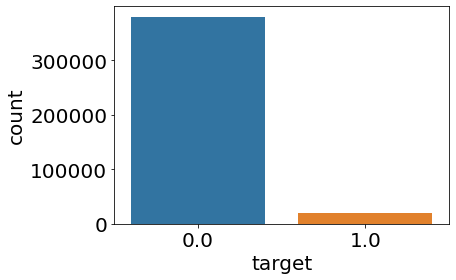

In [ ]:
import seaborn as sns

sns.countplot(df['target'])

In [ ]:
df_train.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0.0,12.3039,-8.3899,9.1944,8.0649,9.0247,-1.9559,5.1565,21.1631,2.7437,8.5623,-9.1195,-5.0654,14.0421,9.3000,11.4089,14.7424,5.4342,-9.7680,11.9534,4.5106,13.3095,27.9682,10.3165,2.4899,8.7296,14.2002,3.8301,0.5474,5.2150,4.8237,-24.0381,10.9788,0.2066,20.0695,11.2086,1.4242,5.5014,4.1958,6.8433,...,30.6330,5.4488,7.0295,3.4218,1.3661,19.1868,3.3058,-4.5841,3.4557,6.0094,-8.3475,7.9825,13.5424,-0.2908,13.9061,11.8151,3.0716,15.0284,2.1214,8.0848,-4.8168,10.6747,-2.1049,8.8938,19.6247,-2.7233,13.4097,-20.9951,20.2230,-0.3264,5.5185,7.9504,0.9184,5.9945,11.0078,-1.0936,-2.3412,8.1712,12.9046,-1.9309
1,0.0,15.4069,2.7820,9.2951,7.1997,8.5359,-4.5422,5.4210,9.9651,4.0623,8.4689,-6.0590,0.7759,13.7854,4.0456,5.4438,13.8766,8.6089,-16.3946,20.4100,18.2099,11.9410,29.8901,11.0320,3.4647,4.9191,13.5724,-10.3379,-0.5933,5.5332,3.7098,-22.4284,8.6950,0.4795,18.2231,11.6430,-5.9229,5.7317,3.3921,6.5169,...,16.9319,5.5766,4.9744,12.8968,-1.7498,16.7136,3.3190,-4.8081,1.0132,5.9494,-5.5387,2.0530,15.1127,-4.3515,19.6645,13.2448,-8.3029,8.8979,11.6191,2.5894,-2.2567,10.0503,-5.1231,9.7286,-3.4912,5.4957,12.0615,-17.0887,10.5468,0.5903,3.0063,5.6555,2.1527,1.3518,15.4728,0.2686,6.5523,8.4698,22.0454,1.4756
2,0.0,9.6427,-4.6261,6.9610,5.4054,12.0859,-11.2917,4.5290,13.8605,-0.8366,8.4388,-4.8543,-3.8446,13.7602,11.3746,9.2359,14.9431,7.9527,-6.8255,12.5890,21.1809,9.1416,27.5496,4.1218,3.8318,6.1385,14.4584,0.0636,-1.5841,5.1242,7.3442,3.3498,4.8306,-1.3744,18.3092,11.8856,7.3965,3.7448,8.7036,8.1327,...,23.6963,5.2485,8.7027,8.3478,-5.7018,19.3036,2.7621,0.7174,3.7536,6.2652,-7.7119,3.1409,17.9489,-6.6449,4.4238,10.9679,-10.2859,8.2506,9.9924,5.9168,-3.7932,11.4330,8.0982,15.4265,7.4456,0.2757,7.5569,-7.1702,15.3692,0.4535,3.4351,9.1779,1.5004,1.9895,20.4072,-0.1118,0.5692,9.3290,12.8980,-9.4318
3,1.0,9.6881,-5.6696,11.2709,8.2812,13.9232,-16.1434,4.9664,20.1092,-5.9868,8.4514,-2.8435,-6.8732,14.2079,6.5918,11.2923,14.1828,10.0402,1.2997,20.5645,28.4864,10.9094,7.2806,5.0493,3.6683,14.8643,13.7662,-9.7314,-1.3767,4.7863,2.0560,-16.1634,13.5568,-1.1293,7.6161,11.9110,2.8845,4.0571,7.9969,10.3673,...,24.3598,6.1042,6.8922,17.9486,0.3322,11.7082,2.8908,-5.6976,8.1320,5.2168,-5.0848,-4.4787,22.2903,4.3004,28.5218,12.3033,3.7143,13.6896,16.9191,2.7819,-8.9304,9.5898,-10.1931,17.1104,25.9923,-12.5229,11.8213,-15.8289,19.5687,1.2158,-4.9494,9.2727,1.1371,3.7435,20.6906,1.3752,7.4442,9.2145,18.2777,-2.5865
4,0.0,7.1128,-2.0830,11.4807,8.3033,10.6180,-6.4743,5.0078,21.0212,-4.9779,9.1260,4.6706,-10.6114,13.7493,6.3089,4.9396,15.0864,11.1357,-10.7133,11.6957,3.6591,18.2128,23.6617,1.6646,2.6451,6.1443,13.9475,-8.1451,-0.6311,5.6320,2.3330,1.0674,13.3107,-2.3119,11.2375,11.9568,7.8714,8.0269,8.7347,8.4093,...,21.4064,5.5814,6.0163,17.4770,-1.0434,14.3632,2.5999,-0.3436,5.7521,5.7825,0.8032,-2.7698,13.2530,-0.1776,15.6257,17.1736,0.6404,11.1395,15.4044,2.4522,-9.5583,8.9755,-0.8453,8.9209,20.0507,-9.1914,5.8473,-7.1620,19.8325,2.1774,7.3583,8.1992,1.3436,8.8929,21.6711,-2.0557,6.4975,8.3110,13.7728,-5.9028


In [ ]:
df_class_0 = df_train[df_train['target'] == 0]
df_class_1 = df_train[df_train['target'] == 1]

In [ ]:
count_class_0, count_class_1 = df_train.target.value_counts()

In [ ]:
count_class_0


143999

In [ ]:
count_class_1

16001

In [ ]:
df_class_0.sample(count_class_1)

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
81673,0.0,12.4531,3.9969,9.3640,6.9995,9.0001,-9.3894,5.8992,16.3132,-0.4512,5.0099,6.6348,-4.2032,14.1913,1.1131,4.1261,14.8267,7.5713,-3.5808,18.2614,14.2516,5.5799,10.5692,9.4095,2.8768,3.1162,13.6373,-0.2378,-1.8215,6.5684,7.1694,-3.1710,11.3622,1.3677,15.9088,11.4673,0.9933,0.1006,4.1137,7.7546,...,40.1653,5.6791,5.6804,8.6816,-4.2480,21.2831,2.7401,-2.7298,4.4660,5.1773,-1.3659,-8.1926,14.0541,2.0757,16.9326,14.8899,-8.6020,16.5003,-2.1434,-1.3277,-18.4258,9.1282,-2.2462,6.2328,28.6367,-6.8510,8.6135,-13.8844,15.0428,0.3045,-0.3991,4.4386,2.8900,5.4716,17.6436,1.5290,6.1842,8.8556,20.4929,1.6986
17926,0.0,14.0950,4.4378,10.7253,6.5106,13.1638,-2.0798,5.5193,10.5380,-5.0636,9.4545,-10.5010,-4.6687,14.2301,13.9770,4.2636,15.2465,14.7378,-9.8395,28.6376,10.8610,22.9119,15.2992,1.6031,2.9997,16.3836,13.9426,-1.8219,-2.7677,5.4392,6.1809,-2.4628,13.2861,-1.8934,7.3807,11.7755,9.6637,0.1025,1.7310,10.7403,...,24.8057,5.4889,6.8825,14.3941,-1.1518,19.4847,2.0716,-11.1153,4.7048,4.8701,7.6929,4.6757,17.7497,-1.2208,16.7319,14.7653,-3.5495,9.9043,-6.4165,5.9777,-10.7006,9.3571,1.6007,4.6062,13.5212,2.8157,12.2658,-15.8810,21.0415,1.1515,14.1942,9.8462,3.2843,7.8097,21.3505,0.6838,-2.0331,9.3814,17.5015,-16.3876
35513,0.0,15.4827,-8.5570,11.6467,3.7273,8.4363,5.3741,6.6350,12.5606,2.0633,6.1693,3.0866,8.2081,14.0939,6.7694,5.8281,13.9936,9.7548,-12.3229,9.1088,0.6349,26.3982,-1.6237,5.6633,3.5342,9.0936,13.2759,-0.9284,-1.9370,5.4261,4.0322,1.0367,11.7704,1.2536,19.3620,11.2107,3.1422,5.0065,3.5154,4.6354,...,14.4621,5.9315,6.8646,12.8872,3.7240,15.5365,3.5035,-11.8155,1.4198,5.4194,-6.2306,-4.4529,22.7229,2.9160,6.6968,13.0151,-15.0858,13.1134,12.8001,6.3089,-5.1832,10.0595,10.4618,11.1992,8.2195,-2.9248,6.5654,-26.0717,7.7870,1.8182,11.9652,8.2079,1.3034,4.5471,14.3179,0.8406,4.8990,9.6389,14.5959,7.8550
58434,0.0,14.7155,-3.2760,9.7070,5.8434,11.9090,-6.9658,5.4218,20.4191,3.9802,6.2979,-6.5422,-7.2653,13.9056,11.0591,6.9096,14.7552,9.5216,-14.7045,10.6522,12.6916,8.4299,13.9765,4.1430,2.6578,7.7086,13.3354,-12.3702,-1.6214,4.3126,11.1470,-6.8547,10.5651,-2.5025,17.0313,10.3774,8.5998,3.3505,2.9817,17.4962,...,32.4221,5.4140,4.3951,4.2325,6.1995,17.2858,2.8871,-10.8669,4.1925,5.9784,10.4492,-1.7501,20.1344,9.3117,25.4986,12.2912,4.4925,13.3349,1.1952,5.1914,-1.3241,7.9564,12.9240,5.1982,17.5692,1.6181,10.6456,8.9782,10.3827,0.2801,11.0646,5.5859,1.6369,-1.2056,17.1359,-1.4246,2.1175,9.1980,18.1828,-26.3746
148226,0.0,7.5314,-1.2656,12.4092,9.3517,11.6308,0.6198,7.2182,14.4459,-0.3845,7.5115,-3.5724,-3.9804,14.3472,13.2300,8.9754,14.6398,11.6414,-22.7511,17.8943,-2.5707,12.7092,16.3364,4.4416,2.6135,6.1948,13.7257,7.5405,-0.2177,6.5119,1.6407,2.1281,11.2895,2.4263,10.0412,11.7439,2.4901,3.0626,5.7799,6.1755,...,22.8253,5.3537,7.1917,13.4215,-2.1748,16.6833,3.4505,1.1345,9.2049,5.8980,-1.0764,5.5085,26.7275,4.9256,13.7542,7.5817,13.1985,8.1750,9.0013,3.6295,0.7860,9.9486,8.6791,7.8538,10.2953,-1.4131,14.7531,-10.4384,15.0872,0.7982,2.8605,5.7849,0.6921,-0.0149,21.8414,-1.8250,8.1220,9.2527,12.3129,-6.6490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153314,0.0,8.5995,-

In [ ]:
df_class_0_under  = df_class_0.sample(count_class_1)


In [ ]:
type(df_class_0_under)

pandas.core.frame.DataFrame

In [ ]:
type(df_class_1)

pandas.core.frame.DataFrame

In [ ]:
df_train_balance = pd.concat([df_class_0_under,df_class_1], axis = 0)

In [ ]:
df_train_balance.shape

(32002, 201)

# Hyperparameter Tuning

In [ ]:
# Implement me

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

models = {'lr': LogisticRegression(class_weight='balanced', random_state=random_seed),
          'mlpc': MLPClassifier(early_stopping=True, random_state=random_seed),
          'rfc': RandomForestClassifier(class_weight='balanced', random_state=random_seed),
          'hgbc': HistGradientBoostingClassifier(random_state=random_seed)}

In [ ]:
from sklearn.pipeline import Pipeline

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])

In [ ]:
# Get the:
# feature matrix and target velctor in the combined training and validation data
# target vector in the combined training and validation data
# PredefinedSplit
# See the implementation in pmlm_utilities.ipynb
X_train_val, y_train_val, ps = get_train_val_ps(X_train, y_train, X_val, y_val)

In [ ]:
ps

PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0]))

In [ ]:
X_train_val.shape

(200000, 200)

In [ ]:
X_train.shape

(160000, 200)

In [ ]:
param_grids = {}


In [ ]:
# The parameter grid of tol
tol_grid = [10 ** -5, 10 ** -4, 10 ** -3]

# The parameter grid of C
C_grid = [0.1, 1, 10]

# Update param_grids
param_grids['lr'] = [{'model__tol': tol_grid,
                      'model__C': C_grid}]

In [ ]:
# The grids for alpha
alpha_grids = [10 ** i for i in range(-5, -2)]

# The grids for learning_rate_init
learning_rate_init_grids = [10 ** i for i in range(-4, -1)]

# Update param_grids
param_grids['mlpc'] = [{'model__alpha': alpha_grids,
                        'model__learning_rate_init': learning_rate_init_grids}]

In [ ]:
[10 ** i for i in range(-4, -1)]

[0.0001, 0.001, 0.01]

In [ ]:
# The grids for min_samples_split
min_samples_split_grids = [2, 20, 100]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1, 20, 100]

# Update param_grids
param_grids['rfc'] = [{'model__min_samples_split': min_samples_split_grids,
                       'model__min_samples_leaf': min_samples_leaf_grids}]

In [ ]:
# The grids for learning_rate
learning_rate_grids = [10 ** i for i in range(-3, 2)]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1, 20, 100]

# Update param_grids
param_grids['hgbc'] = [{'model__learning_rate': learning_rate_grids,
                        'model__min_samples_leaf': min_samples_leaf_grids}]

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/toy_day_weather_plan/cv_results/RandomizedSearchCV/')
if not os.path.exists(directory):
    os.makedirs(directory)

# Model Selection

In [ ]:
# Implement me
from sklearn.model_selection import RandomizedSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []

# For each model
for acronym in pipes.keys():

    gs = RandomizedSearchCV(estimator=pipes[acronym],
                      param_distributions=param_grids[acronym],
                      n_iter=2,
                      scoring='f1_macro',
                      n_jobs=2,
                      cv=ps,
                      random_state = random_seed,
                      return_train_score = True)
        
    # Fit the pipeline
    gs = gs.fit(X_train_val, y_train_val)
    
    # Update best_score_params_estimator_gs
    best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
    # Move the important columns ahead
    cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

    # Write cv_results file
    cv_results.to_csv(path_or_buf=abspath_curr + '/result/toy_day_weather_plan/cv_results/RandomizedSearchCV/' + acronym + '.csv', index=False)

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

,best_score,best_param,best_estimator
0,0.683715,"{'model__min_samples_split': 20, 'model__min_s...","((DecisionTreeClassifier(max_features='auto', ..."
1,0.654133,"{'model__min_samples_leaf': 100, 'model__learn...",(HistGradientBoostingClassifier(learning_rate=...
2,0.650092,"{'model__learning_rate_init': 0.001, 'model__a...","(MLPClassifier(alpha=1e-05, early_stopping=Tru..."
3,0.640004,"{'model__tol': 0.0001, 'model__C': 0.1}","(LogisticRegression(C=0.1, class_weight='balan..."


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support


# The DecisionTreeClassifier
rfc = RandomForestClassifier(class_weight='balanced', min_samples_leaf=100, min_samples_split=20 ,random_state=random_seed)

rfc.fit(X_train_val, y_train_val)

y_pred = rfc.predict(X_test)

# Get the precision, recall, f-score and support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='micro')

# Print the precision, recall and f-score
pd.DataFrame([[precision, recall, fscore]], columns=['precision', 'recall', 'f-score'])





,precision,recall,f-score
0,0.85563,0.85563,0.85563


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.85563

# Generating the Submission File
Use the best model selected earlier to generate the submission file for this kaggle competition.

## Creating the directory for the submission file

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + 'result/submission/')
if not os.path.exists(directory):
    os.makedirs(directory)

## Generating the submission file

In [ ]:
# Get the prediction on the test data using the best model
y_test_pred = rfc.predict(X_test)

# Transform y_test_pred back to the original class
#y_test_pred = le.inverse_transform(y_test_pred)

# Get the submission dataframe
df_submit = pd.DataFrame(np.hstack((df_raw_test[['ID_code']], y_test_pred.reshape(-1, 1))),
                         columns=['ID_code', target])                                                                                     

# Generate the submission file
df_submit.to_csv(abspath_curr + 'result/submission/submission_2.csv', index=False)